In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline
random.seed(7)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# src_csv = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'concrete.csv'))
# df = pd.read_csv(src_csv)

# df.head()

df_train = pd.read_csv('train_concrete.csv')
df_test = pd.read_csv('test_concrete.csv')
df_dev = pd.read_csv('dev_concrete.csv')

X_train = df_train.iloc[:, :-1].values
X_test = df_test.iloc[:, :-1].values
X_dev = df_dev.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values.reshape(-1,1)
y_test = df_test.iloc[:, -1].values.reshape(-1,1)
y_dev = df_dev.iloc[:, -1].values.reshape(-1,1)

In [4]:
X_train = df_train.drop(df_train.columns[-1], axis=1).values
y_train = df_train[df_train.columns[-1]].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

(618, 6) (618, 1)


In [144]:
# train, validation, test = 60%, 20%, 20%
# X_tv, X_test, y_tv, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=7)
# X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=7)

In [5]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
print(X_poly.shape)
model = LinearRegression()
model.fit(X_poly, y_train)
y_pred = model.predict(poly.fit_transform(X_dev))

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)
mae_in = mae


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
X_poly
# print(model.intercept_)
# print(model.coef_)

(618, 28)
0.31437490722689754


array([[ 1.        ,  0.30761519,  2.21411726, ...,  0.23016244,
         0.409896  ,  0.72998328],
       [ 1.        ,  0.36026913,  1.63176108, ...,  2.31326554,
         3.21500919,  4.46826528],
       [ 1.        ,  0.94616388,  0.25496327, ...,  1.19064224,
         0.16712146,  0.02345758],
       ...,
       [ 1.        , -0.86991838, -0.8581924 , ...,  0.51439997,
         1.74834675,  5.94229491],
       [ 1.        ,  1.85564103,  0.53383806, ...,  0.28574578,
        -0.08187126,  0.02345758],
       [ 1.        ,  0.3143166 , -0.8581924 , ...,  0.5409357 ,
        -0.11264564,  0.02345758]])

In [12]:
class MyPolynomialFeatures: 
    def __init__(self, degree=3):
        self.degree = degree
        
    def fit_transform(self, X):
        n_samples, n_features = X.shape    
        X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
        
        X_poly = np.empty((n_samples, 0))
        iters = np.zeros(self.degree + 1).astype(int)
    
        while iters[0] == 0:
            new_X = np.ones((n_samples, 1))
            
            for i in iters:
                if i != 0:
                    new_X *= X[:, i].reshape((n_samples, 1))
                
            X_poly = np.concatenate((X_poly, new_X), axis=1)
            
            i = self.degree
            iters[i] += 1
            while iters[i] > n_features:
                iters[i] = 0
                i -= 1
                iters[i] += 1
            for j in range(i + 1, self.degree + 1):
                iters[j] = iters[i]
        
        return X_poly
    
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X_train)

array([[ 1.        ,  0.30761519,  2.21411726, ...,  0.23016244,
         0.409896  ,  0.72998328],
       [ 1.        ,  0.36026913,  1.63176108, ...,  2.31326554,
         3.21500919,  4.46826528],
       [ 1.        ,  0.94616388,  0.25496327, ...,  1.19064224,
         0.16712146,  0.02345758],
       ...,
       [ 1.        , -0.86991838, -0.8581924 , ...,  0.51439997,
         1.74834675,  5.94229491],
       [ 1.        ,  1.85564103,  0.53383806, ...,  0.28574578,
        -0.08187126,  0.02345758],
       [ 1.        ,  0.3143166 , -0.8581924 , ...,  0.5409357 ,
        -0.11264564,  0.02345758]])

In [13]:
class MyLinearRegression_LSM:
    def __init__(self, learning_rate=0.01, epochs=1000, bias=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.bias = bias
        self.theta = None
        
    def fit(self, X, y):
        if self.bias:
            X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
            
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        if self.bias:
            return X @ self.theta[1:] + self.theta[0]
        else:
            return X @ self.theta
    

model = MyLinearRegression_LSM(bias=False)
model.fit(poly.fit_transform(X_train), y_train)
print(poly.fit_transform(X_dev).shape, model.theta.shape)
y_pred = model.predict(poly.fit_transform(X_dev))

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae, mae_in)

(206, 28) (28, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 6)

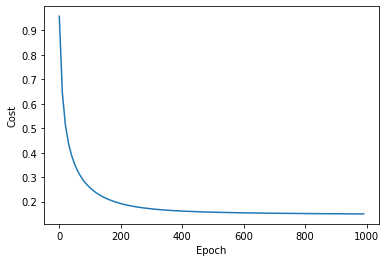

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 6)

In [10]:
class MyLinearRegression_BGD:
    def __init__(self, learning_rate=0.01, degree=1, epochs=1000, bias=True):
        self.learning_rate = learning_rate
        self.degree = degree
        self.epochs = epochs
        self.bias = bias
        self.theta = None

    def fit(self, X, y):
        if self.bias:
            X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        n_samples, n_dims = X.shape

        self.theta = np.zeros((n_dims, 1))

        cost_list = []
        epoch_list = []

        for epoch in range(self.epochs):
            y_pred = X @ self.theta

            dt = (2 / n_samples) * (X.T @ (y_pred - y))

            self.theta -= self.learning_rate * dt

            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y))
                cost_list.append(cost)
                epoch_list.append(epoch)

        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()

    def predict(self, X):
        if self.bias:
            return X @ self.theta[1:] + self.theta[0]
        else:
            return X @ self.theta


model = MyLinearRegression_BGD(bias=False)
model.fit(poly.fit_transform(X_train), y_train)
y_pred = model.predict(poly.fit_transform(X_dev))

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mse)
print(r2)